In [3]:
from backtesting.test import EURUSD
from utils.technical_indicators import SMA,BBANDS

import numpy as np

In [4]:
data = EURUSD.copy()
data

,Open,High,Low,Close,Volume
2017-04-19 09:00:00,1.07160,1.07220,1.07083,1.07219,1413
2017-04-19 10:00:00,1.07214,1.07296,1.07214,1.07260,1241
2017-04-19 11:00:00,1.07256,1.07299,1.07170,1.07192,1025
2017-04-19 12:00:00,1.07195,1.07280,1.07195,1.07202,1460
2017-04-19 13:00:00,1.07200,1.07230,1.07045,1.07050,1554
...,...,...,...,...,...
2018-02-07 11:00:00,1.23390,1.23548,1.23386,1.23501,2203
2018-02-07 12:00:00,1.23501,1.23508,1.23342,1.23422,2325
2018-02-07 13:00:00,1.23422,1.23459,1.23338,1.23372,2824
2018-02-07 14:00:00,1.23374,1.23452,1.23238,1.23426,4065


In [5]:
close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

data = data.dropna().astype(float)

Classification accuracy:  0.4210960032962505


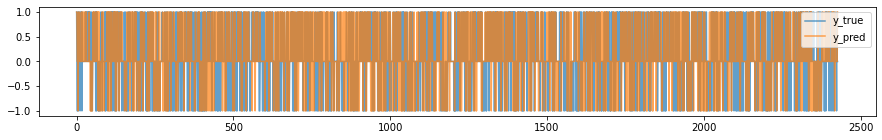

In [6]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from utils.cleandata import *

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [7]:
from backtesting import Backtest
from model.Knn import KnnStrategy

In [8]:
bt = Backtest(data, KnnStrategy, commission=.0002, margin=.05)
bt.run()

Start                     2017-04-25 12:00:00
End                       2018-02-07 15:00:00
Duration                    288 days 03:00:00
Exposure Time [%]                     79.4124
Equity Final [$]                      14165.3
Equity Peak [$]                       14979.1
Return [%]                            41.6529
Buy & Hold Return [%]                 12.8699
Return (Ann.) [%]                      42.861
Volatility (Ann.) [%]                 26.9031
Sharpe Ratio                          1.59316
Sortino Ratio                         3.59148
Calmar Ratio                           4.5411
Max. Drawdown [%]                    -9.43847
Avg. Drawdown [%]                    -1.10673
Max. Drawdown Duration       41 days 23:00:00
Avg. Drawdown Duration        2 days 15:00:00
# Trades                                  354
Win Rate [%]                          52.5424
Best Trade [%]                       0.578258
Worst Trade [%]                     -0.519427
Avg. Trade [%]                    

In [9]:
bt.plot()

Row(id='1497', ...)